In [3]:
import pandas as pd
AM = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [4]:
#DATA WRANGLING

In [5]:
AM.head(2)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000


In [6]:
AM.tail(2)

,Date,Time,State,Group,Unit,Sales
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [7]:
AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [8]:
AM.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [9]:
AM.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Unit', 'Sales']  
AM[numerical_columns] = scaler.fit_transform(AM[numerical_columns])

In [11]:
file_path = 'AusApparalSales4thQrt2020.csv'
AM_sales = pd.read_csv(file_path)

In [12]:
scaler = MinMaxScaler()
numerical_columns = ['Unit', 'Sales']
AM_sales[numerical_columns] = scaler.fit_transform(AM_sales[numerical_columns])

# Show the first few rows to confirm the transformation
AM_sales_head = AM_sales.head(8)
AM_sales_head

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873
5,1-Oct-2020,Afternoon,WA,Men,0.126984,0.126984
6,1-Oct-2020,Afternoon,WA,Women,0.015873,0.015873
7,1-Oct-2020,Afternoon,WA,Seniors,0.142857,0.142857


In [13]:
daily_sales = AM_sales.groupby('Date')['Sales'].sum()
daily_sales 

Date
1-Dec-2020     25.682540
1-Nov-2020     16.507937
1-Oct-2020     20.952381
10-Dec-2020    27.285714
10-Nov-2020    16.333333
                 ...    
8-Nov-2020     17.714286
8-Oct-2020     22.380952
9-Dec-2020     26.888889
9-Nov-2020     15.904762
9-Oct-2020     20.476190
Name: Sales, Length: 90, dtype: float64

In [14]:
state_sales = AM.groupby('State')['Sales'].sum()
state_sales

State
 NSW    441.714286
 NT     109.079365
 QLD    177.888889
 SA     339.412698
 TAS    110.222222
 VIC    635.968254
 WA     106.365079
Name: Sales, dtype: float64

In [15]:
time_sales = AM.groupby('Time')['Sales'].sum()
time_sales

Time
 Afternoon    643.857143
 Evening      631.666667
 Morning      645.126984
Name: Sales, dtype: float64

In [16]:
state_time_sales = AM.groupby(['State', 'Time'])['Sales'].sum().unstack()
state_time_sales

Time,Afternoon,Evening,Morning
State,,,
NSW,148.000000,145.476190,148.238095
NT,36.253968,37.000000,35.825397
QLD,60.619048,56.079365,61.190476
SA,115.714286,111.539683,112.158730
TAS,37.269841,36.603175,36.349206
VIC,211.190476,210.031746,214.746032
WA,34.809524,34.936508,36.619048


In [17]:
group_sales = AM.groupby('Group')['Sales'].sum()
group_sales

Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64

In [ ]:
#DATA ANALYSIS

In [18]:
AM.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [19]:
#or

In [20]:
# Descriptive statistics for the 'Sales' column
sales_mean = AM['Sales'].mean()
sales_median = AM['Sales'].median()
sales_mode = AM['Sales'].mode()[0]
sales_std = AM['Sales'].std()

# Descriptive statistics for the 'Unit' column
unit_mean = AM['Unit'].mean()
unit_median = AM['Unit'].median()
unit_mode = AM['Unit'].mode()[0]
unit_std = AM['Unit'].std()

# Output the results
print("Descriptive statistics for Sales:")
print("Mean:", sales_mean)
print("Median:", sales_median)
print("Mode:", sales_mode)
print("Standard Deviation:", sales_std)

print("\nDescriptive statistics for Unit:")
print("Mean:", unit_mean)
print("Median:", unit_median)
print("Mode:", unit_mode)
print("Standard Deviation:", unit_std)

Descriptive statistics for Sales:
Mean: 0.25405433778449654
Median: 0.1904761904761905
Mode: 0.1111111111111111
Standard Deviation: 0.2047841710728009

Descriptive statistics for Unit:
Mean: 0.2540543377844965
Median: 0.19047619047619047
Mode: 0.1111111111111111
Standard Deviation: 0.20478417107280086


In [21]:
total_sales_per_group = AM.groupby('Group')['Sales'].sum()
highest_sales_group = total_sales_per_group.idxmax()
lowest_sales_group = total_sales_per_group.idxmin()
# Display the results
print(f"The group with the highest sales is: {highest_sales_group} with sales of {total_sales_per_group[highest_sales_group]}")
print(f"The group with the lowest sales is: {lowest_sales_group} with sales of {total_sales_per_group[lowest_sales_group]}")

The group with the highest sales is:  Men with sales of 484.44444444444446
The group with the lowest sales is:  Seniors with sales of 473.57142857142856


In [22]:
total_sales_per_group = AM.groupby('State')['Sales'].sum()
highest_sales_State = total_sales_per_group.idxmax()
highest_sales_State

' VIC'

In [23]:
lowest_sales_State = total_sales_per_group.idxmin()
lowest_sales_State

' WA'

In [38]:
print(AM.columns)

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [46]:
AM = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [47]:
AM['Date'] = pd.to_datetime(AM['Date'])

In [48]:
AM.set_index('Date', inplace=True)

In [49]:
weekly_report = AM['Sales'].resample('W').sum()
weekly_report

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [50]:
monthly_report = AM['Sales'].resample('M').sum()
monthly_report

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

In [51]:
quarterly_report = AM['Sales'].resample('Q').sum()
quarterly_report

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

In [37]:
weekly_report.to_csv('weekly_report.csv')
monthly_report.to_csv('monthly_report.csv')
quarterly_report.to_csv('quarterly_report.csv')

# Display reports
print("Weekly Report:\n", weekly_report)
print("\nMonthly Report:\n", monthly_report)
print("\nQuarterly Report:\n", quarterly_report)

Weekly Report:
 Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

Monthly Report:
 Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

Quarterly Report:
 Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


In [55]:
weekly_report = AM.resample('W').agg({'Sales': 'sum', 'Unit': 'mean'})
weekly_report


,Sales,Unit
Date,,
2020-10-04,15045000,17.910714
2020-10-11,27002500,18.369048
2020-10-18,26640000,18.122449
2020-10-25,26815000,18.241497
2020-11-01,21807500,17.307540
2020-11-08,20865000,14.193878
2020-11-15,21172500,14.403061
2020-11-22,21112500,14.362245
2020-11-29,21477500,14.610544


In [56]:
monthly_report = AM.resample('M').agg({'Sales': 'sum', 'Unit': 'mean'})
monthly_report

,Sales,Unit
Date,,
2020-10-31,114290000,18.141270
2020-11-30,90682500,14.394048
2020-12-31,135330000,21.480952


In [57]:
quarterly_report = AM.resample('Q').agg({'Sales': 'sum', 'Unit': 'mean'})
quarterly_report

,Sales,Unit
Date,,
2020-12-31,340302500,18.005423


In [ ]:
#DATA VISUALIZATION

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
print(AM.columns)

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [65]:
Data = pd.read_csv('AusApparalSales4thQrt2020.csv')

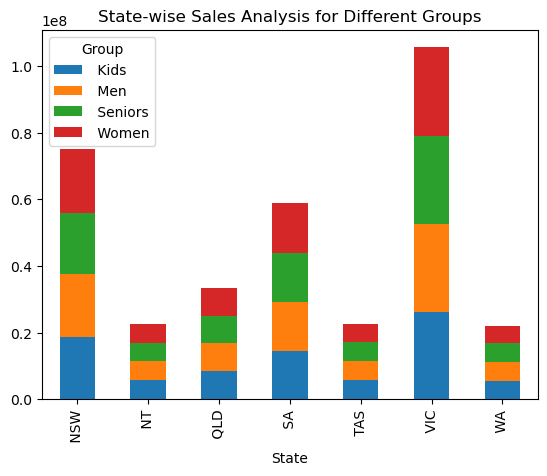

In [66]:
state_group_sales = Data.groupby(['State', 'Group'])['Sales'].sum().unstack()
state_group_sales.plot(kind='bar', stacked=True)
plt.title('State-wise Sales Analysis for Different Groups')
plt.show()

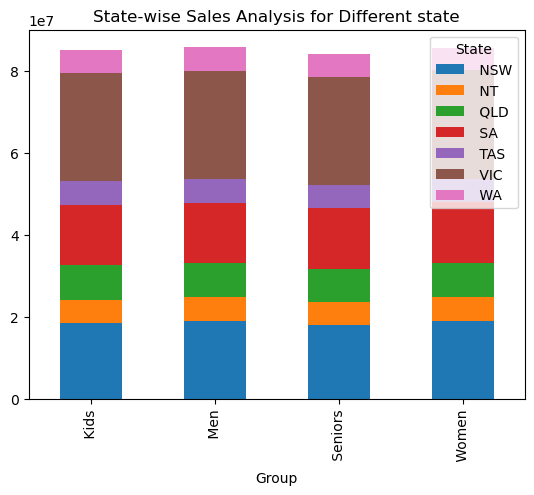

In [73]:
group_state_sales = Data.groupby(['Group', 'State'])['Sales'].sum().unstack()
group_state_sales.plot(kind='bar', stacked=True)
plt.title('State-wise Sales Analysis for Different state')
plt.show()

Highest sales during:  Morning
Lowest sales during:  Evening


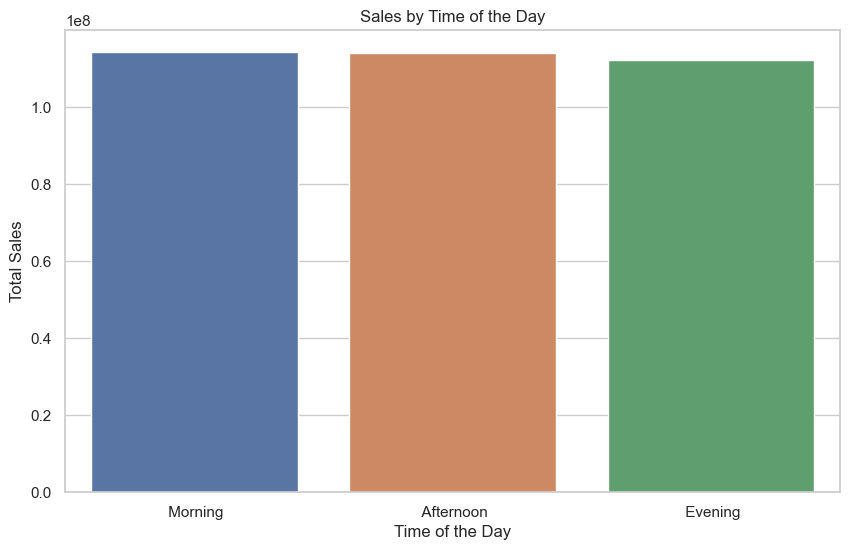

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure proper data types
# df['Time'] should have categories like 'Morning', 'Afternoon', 'Evening'
# df['Sales'] should be numeric

# Group the data by 'Time' and sum 'Sales'
time_sales = AM.groupby('Time')['Sales'].sum().reset_index()

# Sort the results to identify highest and lowest sales times
time_sales_sorted = time_sales.sort_values(by='Sales', ascending=False)

# Print the time with the highest and lowest sales
print("Highest sales during:", time_sales_sorted.iloc[0]['Time'])
print("Lowest sales during:", time_sales_sorted.iloc[-1]['Time'])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=time_sales_sorted, x='Time', y='Sales', order=time_sales_sorted['Time'])
plt.title('Sales by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()
